In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1.Version of NumPy
print(np.__version__)
print(pd.__version__)

1.23.3
1.4.4


In [3]:
df = pd.read_csv('housing.csv')

# 2.Number of records in the dataset
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
feats = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

df = df[feats]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# EDA

In [7]:
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

<AxesSubplot:>

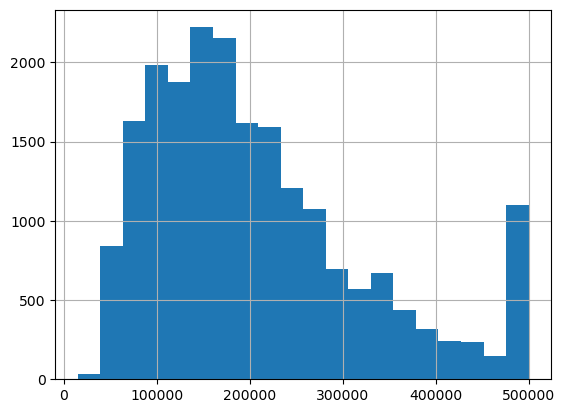

In [8]:
df['median_house_value'].hist(bins=20)

In [9]:
df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Question 1: Number of missing values

L_miss=[]
L_hit = []
for i in df.columns:
    L_miss.append(df[i].isna().sum())
    L_hit.append(df[i].notna().sum()/df.shape[0])
pd.DataFrame({'predictor':df.columns,'missing':L_miss, 'hit':L_hit})
    

,predictor,missing,hit
0,latitude,0,1.000000
1,longitude,0,1.000000
2,housing_median_age,0,1.000000
3,total_rooms,0,1.000000
4,total_bedrooms,207,0.989971
5,population,0,1.000000
6,households,0,1.000000
7,median_income,0,1.000000
8,median_house_value,0,1.000000


In [11]:
# Question 2: Median for population
df['population'].median()

1166.0

# Setting up the validation framework

In [12]:
n = len(df)
print(n)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n_val, n_test, n_train)

20640
4128 4128 12384


In [13]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [14]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [16]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
10292,33.88,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
16722,35.48,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
11730,38.98,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
5993,34.09,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y = 'median_house_value'

# вычисляет log(x+1) для всех x входного массива (Натуральный логарифм от x + 1).
y_train = np.log1p(df_train[y].values)
y_val = np.log1p(df_val[y].values)
y_test = np.log1p(df_test[y].values)

In [19]:
del df_train[y]
del df_val[y]
del df_test[y]
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


# linear_regression

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [21]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

##  median_house_value - fillna(0)

In [22]:
# RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [23]:
# fill missings
def prepare_X(df,a):
    df_num = df
    df_num = df_num.fillna(a)
    X = df_num.values
    return X

In [24]:
X_train = prepare_X(df_train,a=0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val,a=0)
y_pred = w0 + X_val.dot(w)
rmse_val_0 = rmse(y_val, y_pred)
rmse_val_0

0.3295330365229891

<AxesSubplot:ylabel='Count'>

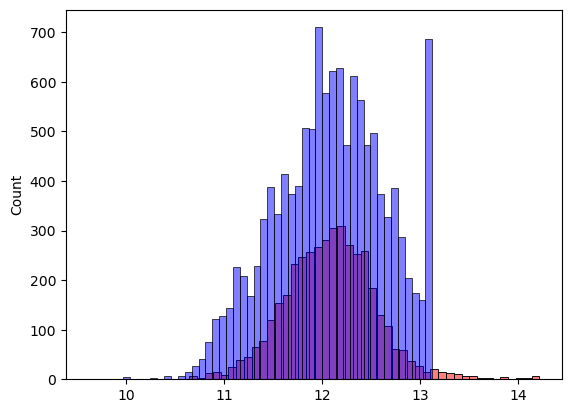

In [25]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## median_house_value - fillna(median)

In [26]:
np.median(y_train)

12.103491596905931

In [27]:
X_train = prepare_X(df_train,a=np.median(y_train))
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val,a=np.median(y_train))
y_pred = w0 + X_val.dot(w)
rmse_val_med = rmse(y_val, y_pred)
rmse_val_med

0.32951735759205375

<AxesSubplot:ylabel='Count'>

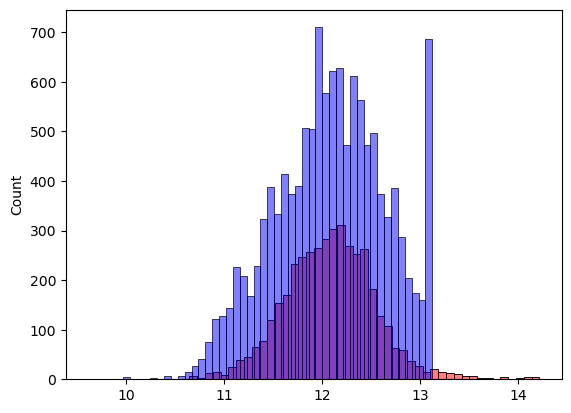

In [28]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [29]:
# Question 3: Best way to fill NAs
print(round(rmse_val_0,2))
print(round(rmse_val_med,2))

0.33
0.33


# Tuning the model

In [30]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [31]:
r_list = []
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train,a=0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val,a=0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    r_list.append(score)
    
    print(r, w0, score)
print(min(r_list))

val_table = pd.DataFrame({'r':[0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10],
             'rmse':r_list}).sort_values(by='rmse')

val_table

0.0 -11.686975243537386 0.3295330365229891
1e-05 -11.686814585840178 0.3295330329444528
0.0001 -11.685368866989617 0.32953300097056076
0.001 -11.67093131983681 0.3295327038665904
0.1 -10.27450028333051 0.3296947205398839
1 -4.92048089815022 0.3337887219998109
10 -0.7899311832663288 0.3406063807808458
0.3295327038665904


,r,rmse
3,0.00100,0.329533
2,0.00010,0.329533
1,0.00001,0.329533
0,0.00000,0.329533
4,0.10000,0.329695
5,1.00000,0.333789
6,10.00000,0.340606


In [32]:
# Question 4: Best regularization parameter r
print(val_table[val_table['rmse']==min(r_list)])

       r      rmse
3  0.001  0.329533


# Using different seeds

In [34]:
rmse_list =[]
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y = 'median_house_value'

    y_train = np.log1p(df_train[y].values)
    y_val = np.log1p(df_val[y].values)
    y_test = np.log1p(df_test[y].values)

    del df_train[y]
    del df_val[y]
    del df_test[y]
    X_train = prepare_X(df_train,a=0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val,a=0)
    y_pred = w0 + X_val.dot(w)
    rmse_list.append( rmse(y_val, y_pred))
    
seed_table = pd.DataFrame({'seed':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'rmse_val':rmse_list})
seed_table 

,seed,rmse_val
0,0,0.338843
1,1,0.336239
2,2,0.332091
3,3,0.340515
4,4,0.338902
5,5,0.343487
6,6,0.345198
7,7,0.339599
8,8,0.346623
9,9,0.336593


In [37]:
# Question 5: STD of RMSE scores for different seeds

print(np.std(seed_table['rmse_val']))
print(round(np.std(seed_table['rmse_val']),3))

0.004170771946792747
0.004


# Resulting model

In [46]:
# Random_seed = 9
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# concat train and validation
df_train_all = pd.concat([df_train,df_val])
df_train_all.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y = 'median_house_value'
y_train_all = np.log1p(df_train_all[y].values)
y_test = np.log1p(df_test[y].values)

del df_train_all[y]
del df_test[y]

# using regularization r=0.001
X_train = prepare_X(df_train_all,a=0)
w0, w = train_linear_regression_reg(X_train, y_train_all, r=0.001)

X_test = prepare_X(df_test,a=0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

# Question 6: RMSE on test

score

0.34531689143718247